## Exploring Rossmann Drug Store Sales Data

In [1]:
import pandas as pd

data = pd.read_csv('./rossmann.csv', skipinitialspace=True, low_memory=False)

In [2]:
print (data.shape)
data.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
data['Store'].value_counts()
# so there are mnay stores

1023    942
666     942
675     942
163     942
674     942
162     942
673     942
161     942
672     942
160     942
158     942
157     942
668     942
156     942
667     942
154     942
657     942
665     942
153     942
664     942
152     942
663     942
151     942
662     942
150     942
661     942
148     942
659     942
147     942
658     942
       ... 
636     758
637     758
879     758
638     758
129     758
604     758
365     758
132     758
644     758
646     758
136     758
137     758
629     758
115     758
113     758
890     758
893     758
620     758
108     758
619     758
385     758
612     758
100     758
611     758
99      758
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

In [4]:
data.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Because we are most interested in the `Date` column that contains the date of sales for each store, we will make sure to process that as a `DateTime` type, and make that the index of our dataframe.

In [5]:
data['Date2'] = pd.to_datetime(data['Date'])

In [6]:
type(data.Date2)

pandas.core.series.Series

In [21]:
data['Date2'].dt.year

Date
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
2015-07-31    2015
              ... 
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01-01    2013
2013-01

In [8]:
type(data['Date2'].dt.year[0])

numpy.int64

In [9]:
data.Date.dtype

dtype('O')

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month

In [11]:
data.head()
data.shape

(1017209, 11)

In [12]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date2,Year,Month
Date,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015-07-31,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015-07-31,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015-07-31,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015-07-31,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015-07-31,2015,7


In [13]:
store1_data = data[data.Store == 1]

In [14]:
type(store1_data)

pandas.core.frame.DataFrame

In [15]:
store1_data.shape

(942, 11)

In [16]:
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date2,Year,Month
Date,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015-07-31,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015-07-30,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015-07-29,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015-07-28,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015-07-27,2015,7


### Data Exploration and MINEing

To compare sales on holidays, we can compare the sales using box-plots, which allows us to compare the distribution of sales on holidays against all other days. On state holidays the store is closed (and as a nice sanity check there are 0 sales)

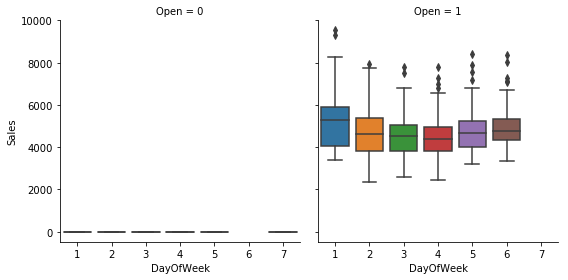

In [18]:
import seaborn as sb
%matplotlib inline
sb.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box' 
)

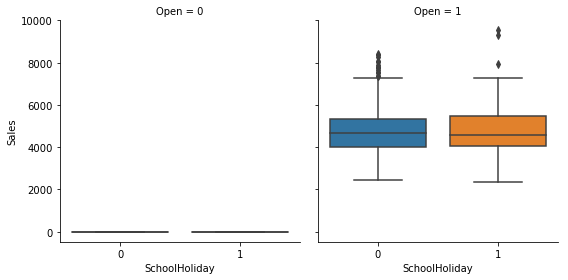

In [19]:
sb.factorplot(
    col='Open',
    x='SchoolHoliday',
    y='Sales',
    data=store1_data, 
    kind='box'
)

What does the plot above tell us about school holiday's vs. regular days?

> Check: See if there is a difference affecting sales on promotion days.

Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?

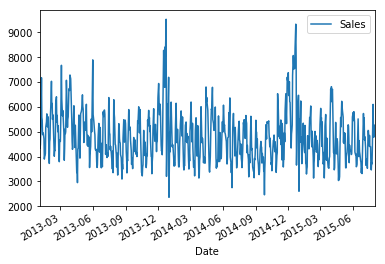

In [22]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()
#store1_data[['Sales']].plot()
#store1_open_data[['Sales','Customers']].plot()

### Autocorrelation

In [24]:
data['Sales'].resample('D').mean().autocorr(lag=7)
# resample by day, incase it was by hours
# similar to groupby
# examine 7 unit back after being resampled

0.55748935887396056

In [28]:
data['Sales'].resample('D').mean()

Date
2013-01-01      87.284560
2013-01-02    6233.030493
2013-01-03    5693.112108
2013-01-04    5954.218834
2013-01-05    5337.751570
2013-01-06     129.061883
2013-01-07    9710.177578
2013-01-08    7847.028700
2013-01-09    6947.626009
2013-01-10    6952.004484
2013-01-11    7210.139910
2013-01-12    5396.852915
2013-01-13     129.194619
2013-01-14    5279.630493
2013-01-15    4944.027803
2013-01-16    4747.103139
2013-01-17    4830.999103
2013-01-18    5504.044843
2013-01-19    5390.306726
2013-01-20     135.964126
2013-01-21    7857.465471
2013-01-22    7462.142601
2013-01-23    6947.590135
2013-01-24    6672.498655
2013-01-25    6978.286099
2013-01-26    5245.533632
2013-01-27     128.114798
2013-01-28    5272.378475
2013-01-29    4890.285202
2013-01-30    5300.250224
                 ...     
2015-07-02    7575.150673
2015-07-03    7650.572197
2015-07-04    5429.843946
2015-07-05     241.478027
2015-07-06    6762.756054
2015-07-07    5733.653812
2015-07-08    6202.354260
2015-07

To measure how much the sales are correlated with each other, we want to compute the _autocorrelation_ of the 'Sales' column. In pandas, we do this with the `autocorr` function.

`autocorr` takes one argument, the `lag` - which is how many prior data points should be used to compute the correlation. If we set the `lag` to 1, we compute the correlation between every point and the point directly preceding it, while setting `lag` to 10, computes the correlation between every point and the point 10 days earlier.

In [30]:
data['Sales'].resample('M').mean().autocorr(lag=12)

0.80727970164527441

In [32]:
store1_data['Sales'].resample('D').mean().autocorr(lag=7) # groupby day, get average

0.63071924328402873

In [35]:
# Comparing every row and its row above
data['Sales'].diff(periods=1).head()

Date
2015-07-31       NaN
2015-07-31     801.0
2015-07-31    2250.0
2015-07-31    5681.0
2015-07-31   -9173.0
Name: Sales, dtype: float64

In [36]:
data['Sales'].resample('D').mean().diff(periods=7).head(14)

Date
2013-01-01            NaN
2013-01-02            NaN
2013-01-03            NaN
2013-01-04            NaN
2013-01-05            NaN
2013-01-06            NaN
2013-01-07            NaN
2013-01-08    7759.744139
2013-01-09     714.595516
2013-01-10    1258.892377
2013-01-11    1255.921076
2013-01-12      59.101345
2013-01-13       0.132735
2013-01-14   -4430.547085
Freq: D, Name: Sales, dtype: float64

In [40]:
pd.rolling_mean(data['Sales'].resample('D').mean(),window=7).head(14)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """Entry point for launching an IPython kernel.


Date
2013-01-01            NaN
2013-01-02            NaN
2013-01-03            NaN
2013-01-04            NaN
2013-01-05            NaN
2013-01-06            NaN
2013-01-07    4734.948147
2013-01-08    5843.483024
2013-01-09    5945.568097
2013-01-10    6125.409865
2013-01-11    6304.827162
2013-01-12    6313.270211
2013-01-13    6313.289174
2013-01-14    5680.353876
Freq: D, Name: Sales, dtype: float64

In pandas we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.

### Data Refining Using Time Series Statistics

### Rolling Averages

If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates.  We want to know what the mean and median sales were for each month and year.

In Pandas, this is performed using the `resample` command, which is very similar to the `groupby` command. It allows us to group over different time intervals.

We can use `data.resample` and provide as arguments:
    - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
    - What aggregation to perform: 'mean', 'median', 'sum', etc.

In [49]:
data[['Sales']].resample('M').mean().head() #the double square brackets will return a dataframe

,Sales
Date,
2013-01-31,5211.555578
2013-02-28,5494.371397
2013-03-31,5820.349168
2013-04-30,5483.749836
2013-05-31,5364.127383


In [50]:
data[['Sales']].resample('A').max().head()

,Sales
Date,
2013-12-31,38025
2014-12-31,38037
2015-12-31,41551


While identifying the monthly averages are useful, we often want to compare the sales data of a date to a smaller window. To understand holidays sales, we don't want to compare late December with the entire month, but perhaps a few days surrounding it. We can do this using rolling averages.

**In pandas, we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.**

In [60]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].resample('D').rolling(window=3, center=True).mean().head(10)
# store1_open_data[['Sales']].rolling(window=3, center=True, freq="D").mean().head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Sales
Date,
2013-01-02,NaN
2013-01-03,4781.000000
2013-01-04,4603.333333
2013-01-05,NaN
2013-01-06,NaN
2013-01-07,NaN
2013-01-08,6075.666667
2013-01-09,5314.333333
2013-01-10,5081.333333


`rolling_mean` (as well as `rolling_median`) takes these important parameters:
    - the first is the series to aggregate
    - `window` is the number of observations to include in the average
    - `center` is whether the window should be centered on the date or use data prior to that date
    - `freq` is on what level to roll-up the averages to (as used in `resample`). Either `D` for day, `M` for month or `A` for year, etc.

Instead of plotting the full timeseries, we can plot the rolling mean instead, which smooths random changes in sales as well as removing outliers, helping us identify larger trends.

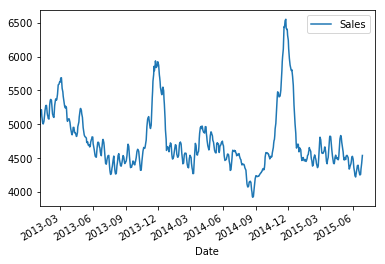

In [59]:
store1_open_data[['Sales']].rolling(window=30).mean().plot()

### Pandas Window functions
Pandas `rolling_mean` and `rolling_median` are only two examples of Pandas window function capabilities. Window functions operate on a set of N consecutive rows (a window) and produce an output.

In addition to `rolling_mean` and `rolling_median`, there are `rolling_sum`, `rolling_min`, `rolling_max`... and many more.

Another common one is `diff`, which takes the difference over time. `pd.diff` takes one arugment, `periods`, which is how many prio rows to use for the difference.


### Pandas expanding functions

In addition to the set of `rolling_*` functions, Pandas also provides a similar collection of `expanding_*` functions, which, instead of using a window of N values, use all values up until that time.

In [61]:
# computes the average sales, from the first date _until_ the date specified.
store1_open_data[['Sales']].sort_index().expanding(min_periods=1).sum()

,Sales
Date,
2013-01-02,5530.0
2013-01-03,9857.0
2013-01-04,14343.0
2013-01-05,19340.0
2013-01-07,26516.0
2013-01-08,32096.0
2013-01-09,37567.0
2013-01-10,42459.0
2013-01-11,47340.0


## Exercises

> Plot the distribution of sales by month and compare the effect of promotions

> Are sales more correlated with the prior date, a similar date last year, or a similar date last month?

> Plot the 15 day rolling mean of customers in the stores

> Identify the date with largest drop in sales from the same date in the previous month

> Compute the total sales up until Dec. 2014

> Bonus 1: When were the largest differences between 15-day moving/rolling averages?
> HINT: Using `rolling_mean` and `diff`

> Bonus 2: Plot a 15 day exponentially weighted rolling mean of sales in stores
> HINT: We did not specifically do an example of this so you will have to search for info on that Pandas rollig type